In [2]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#Procedure to validate a diabetes prediction model
#Step 2: Load the Dataset

from sklearn import datasets
diabetes = datasets.load_diabetes()

allX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Describe the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
#Step 3: Split the Dataset
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)


# Validation

Evaluate the dataset using cross validation to find out which features give the best results


In [5]:
# Step 4: Use Cross-Validation to Evaluate Features
# Here we will use a simple linear regression model and evaluate it using cross-validation
# We will check which features give the best results
# We will use k-fold cross-validation with k=5
from sklearn.model_selection import cross_val_score

#Lets look at one feature first
X_train = allX_train[["bmi"]]
X_test = allX_test[["bmi"]]

# Create a linear regression model
model1 = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model1, X_train, y_train, cv=5)

scores.mean()


np.float64(0.32197089446711075)

In [6]:

# How about using a different feature?
X_train = allX_train[["bp"]]
X_test = allX_test[["bp"]]

# Create a linear regression model
model2 = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model2, X_train, y_train, cv=5)

scores.mean()


np.float64(0.17367884408972853)

In [7]:
# Step throught all single features to see which one is best
best_score = 0
best_feature = ""
                         
for feature in allX.columns:
    X_train = allX_train[[feature]]
    model = LinearRegression()
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    print(f"Feature: {feature}, Cross-Validation Score: {mean_score}")
    if mean_score > best_score:
        best_score = mean_score
        best_feature = feature

print(f"Best Feature: {best_feature}, Best Cross-Validation Score: {best_score}")

Feature: age, Cross-Validation Score: 0.008154403137890398
Feature: sex, Cross-Validation Score: -0.03338229616179431
Feature: bmi, Cross-Validation Score: 0.32197089446711075
Feature: bp, Cross-Validation Score: 0.17367884408972853
Feature: s1, Cross-Validation Score: 0.0017264632806413883
Feature: s2, Cross-Validation Score: -0.012336092382083797
Feature: s3, Cross-Validation Score: 0.09267711310843321
Feature: s4, Cross-Validation Score: 0.13082603665526926
Feature: s5, Cross-Validation Score: 0.2503801381934015
Feature: s6, Cross-Validation Score: 0.12920033567468686
Best Feature: bmi, Best Cross-Validation Score: 0.32197089446711075


In [8]:
# Now try combination of features to see if we can do better
from itertools import combinations
best_score = 0
best_features = ()

for r in range(1, len(allX.columns)+1):
    for feature_combination in combinations(allX.columns, r):
        X_train = allX_train[list(feature_combination)]
        model = LinearRegression()
        scores = cross_val_score(model, X_train, y_train, cv=5)
        mean_score = scores.mean()
        if mean_score > best_score:
            best_score = mean_score
            best_features = feature_combination

print(f"Best Features: {best_features}, Best Cross-Validation Score: {best_score}")


Best Features: ('sex', 'bmi', 'bp', 's1', 's2', 's5'), Best Cross-Validation Score: 0.4665077105636778


# Polynomial regression

Lets now use Polynomial regression on model comprised of the features that we worked out above to find out what degree gives us the best results.

In [9]:
# Step 5 : We will now train the model using the best features found
X_train = allX_train[list(best_features)]
X_test = allX_test[list(best_features)]

# Step 6: Use polynomial regression to improve the results of the model
from sklearn.preprocessing import PolynomialFeatures

#We will evalualte polynomial feature degrees from 1 to 9 and see which one gives us the best results.
best_degree = 1
best_score = 0

#We firstly need to split the training data into a smaller training and validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

for degree in range(1, 10):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_small)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train_small)
    
    y_val_pred = model.predict(X_val_poly)
    score = r2_score(y_val, y_val_pred)
    
    print(f"Degree: {degree}, Validation R2 Score: {score}")
    
    if score > best_score:
        best_score = score
        best_degree = degree

print(f"Best Degree: {best_degree}, Best Validation R2 Score: {best_score}")


Degree: 1, Validation R2 Score: 0.4707834407200523
Degree: 2, Validation R2 Score: 0.40963333757985665
Degree: 3, Validation R2 Score: 0.2932306975325284
Degree: 4, Validation R2 Score: -14.094028871724312
Degree: 5, Validation R2 Score: -1864.3765254281755
Degree: 6, Validation R2 Score: -1474.0189375738203
Degree: 7, Validation R2 Score: -1471.0569966478865
Degree: 8, Validation R2 Score: -1471.0282576154577
Degree: 9, Validation R2 Score: -1471.0349199006912
Best Degree: 1, Best Validation R2 Score: 0.4707834407200523


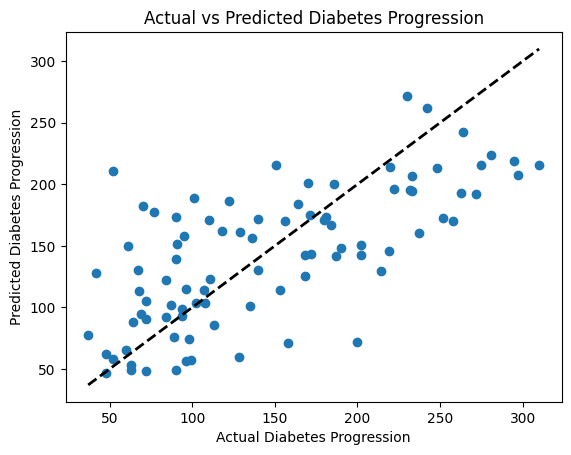

In [10]:
# Step 7 : Plot the results of the trained data vs the validatation data

poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs Predicted Diabetes Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [11]:
# This shows us that degree 1 gives the best results for this dataset.

# Step 7: Finally we can train our final model using the best features and best polynomial degree found above 
# and evaluate it on the test set.

poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse}, Test R2 Score: {r2}")




Test MSE: 2846.2905242137595, Test R2 Score: 0.4627767079320302
